In [1]:
# import torch
# import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import dask
# import dask.dataframe as ddf
import numpy as np
import awkward as ak
from tqdm import tqdm
import pickle
import pandas as pd

In [2]:
# device = (
#     "cuda"
#     if torch.cuda.is_available()
#     else "mps"
#     if torch.backends.mps.is_available()
#     else "cpu"
# )
# print(f"Using {device} device")

In [2]:
with open('/project01/ndcms/cmoore24/skims/full_fatjet_skims/separate_vars/signal_vars.pkl', 'rb') as f:
    signal = pickle.load(f)

In [3]:
hgg = signal['hgg']
hbb = signal['hbb']

In [4]:
# with open('/project01/ndcms/cmoore24/skims/full_fatjet_skims/separate_vars/qcd_vars.pkl', 'rb') as f:
#     background = pickle.load(f)

In [5]:
#qcd = pd.read_pickle('/project01/ndcms/cmoore24/skims/full_fatjet_skims/separate_vars/qcd_vars.pkl')
qcd = pd.read_pickle('./combed_qcd.pkl')

In [6]:
vars = list(qcd['300to470'].keys())

In [7]:
IL = 44.99

In [8]:
xsec = {}
xsec['300to470'] = 6833
xsec['470to600'] = 549.5
xsec['600to800'] = 156.5
xsec['800to1000'] = 26.22
xsec['1000to1400'] = 7.475
xsec['1400to1800'] = 0.6482
xsec['1800to2400'] = 0.08742
xsec['2400to3200'] = 0.005237
xsec['3200toInf'] = 0.0001353

In [59]:
stitched_dict = {}
for j in vars:
    qcd_frac = {}
    for i in qcd:
        qcd_frac[i] = ((xsec[i]*1000)*IL)/len(qcd[i][j])
    qcd_frac['tot'] = sum(qcd_frac.values())
    sval = {}
    for i in qcd:
        sval[i] = qcd_frac[i]/qcd_frac['tot']
    combed = {}
    for i in qcd:
        temp = qcd[i][j]
        combed[i] = temp[np.random.rand(temp.shape[0]) < sval[i]]
    stitched_var = np.concatenate([combed[x] for x in combed])
    stitched_dict[j] = stitched_var

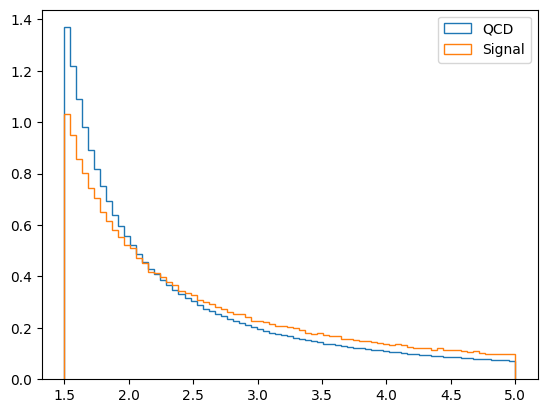

In [16]:
fig, ax = plt.subplots()
plt.hist(qcd['FatJets.color_ring'], range=(1.5,5), bins=75, density=True, histtype='step', label='QCD',#weights=21*np.ones_like(tst)
        )
plt.hist(hgg['FatJets.color_ring'], range=(1.5,5), bins=75, density=True, histtype='step', label='Signal',#weights=21*np.ones_like(tst)
        )
plt.legend()
#plt.yscale('log')
#plt.xlim(100, 5000)
plt.show()

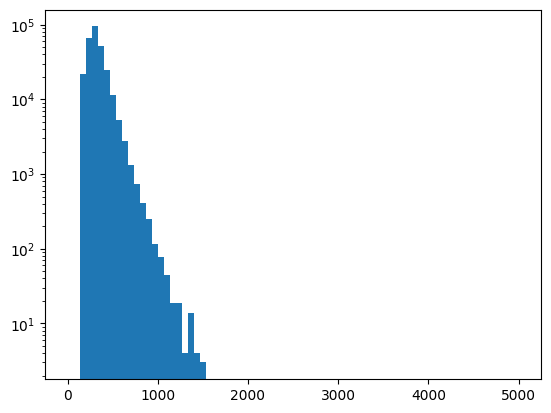

In [83]:
fig, ax = plt.subplots()
plt.hist(hbb['FatJets.pt'], range=(0,5000), bins=75, #density=True, #weights=21*np.ones_like(tst)
        )
plt.yscale('log')
#plt.xlim(100, 5000)
plt.show()

In [84]:
with open('combed_qcd.pkl', 'wb') as f:
    pickle.dump(stitched_dict, f)